# Explore Weather Trends (1. Project)

In this project, local and global temperature data are analyzed and compared.

## Extract the data

Global and city temperature data (yearly means) were downloaded from a database using a SQL query: For the global data the query was:

``
SELECT *
FROM global_data
``


I used 

``
SELECT *
FROM city_list
WHERE country IN ('Germany')
``

to find  cities in my homecountry. I chose Munich as a city and used to following query to obtain city data: 


``
SELECT *
FROM city_data
WHERE city LIKE 'Munich'
``

These data were stored in csv files (result_Munich.csv and results_global.csv)


## Moving Average and line chart
Calculations and plotting of the data was done using Python. The csv files were read into a Pandas data frame and a moving average ( in pandas called rolling window) of a width of 7 years was sent over the data.


In [1]:
#Get Python going
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline

#Read in data from csv files to data frames
temp_muc = pd.read_csv('results_Munich.csv')
temp_global = pd.read_csv('results_global.csv')

#Calculate a moving average of 7 years on the temperature data
temp_global['7yr_avg'] = temp_global['avg_temp'].rolling(window=7).mean()
temp_muc['7yr_avg'] = temp_muc['avg_temp'].rolling(window=7).mean()

#temp_global.plot.line(x='year',y='7yr_avg',figsize=(12,3),lw=1)

Now the data is plotted using matplotlib. Global 7-year average temperatures are shown in red, while local 7 year averages for Munich, Germany are shown in blue. 

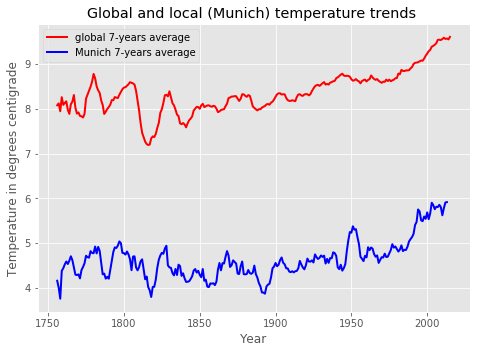

In [23]:
#Plotting the data
fig = plt.figure()

ax = fig.add_axes([0,0,1,1])

#ax.plot(temp_global['year'], temp_global['avg_temp'], label="global", lw=0.5, ls=':', color = 'red')
ax.plot(temp_global['year'], temp_global['7yr_avg'], label="global 7-years average", lw=2, color = 'red')
#ax.plot(temp_muc['year'], temp_muc['avg_temp'], label="MUC", lw=0.5, ls=':', color = 'blue')
ax.plot(temp_muc['year'], temp_muc['7yr_avg'], label="Munich 7-years average", lw=2, color = 'blue')
ax.set_xlabel('Year')
ax.set_ylabel('Temperature in degrees centigrade')
ax.set_title('Global and local (Munich) temperature trends ')
ax.legend()

## Observations

1. Munich has lower temperatures than global means.
2. The plot of global values is smoother than the Munich values, which makes sense, as Munich values are measured, but global values are modelled.
3. In general, the trend of the global and local Munich temperatures is the same: an increasement from about 1900 onwards. The correlation coefficient of the global and the Munich dataset can be calulated using

In [14]:
temp_global.corrwith(temp_muc[temp_muc['year']>1749])


year        1.000000
avg_temp    0.349633
7yr_avg     0.705584
dtype: float64

A correlation coefficient of over 0.7 for the 7years-average values for the globe and Munich can be regarded as highly correlated data

4. On a global scale the bump in temperature which happened in Munich about 1950 cannot be found. Let's check with another city in Europe to what extend this bump can be found elsewhere, when checking on Oslo, Norway and Rome, Italy as well as the antipode of Munich : Wellington, New Zealand.

  

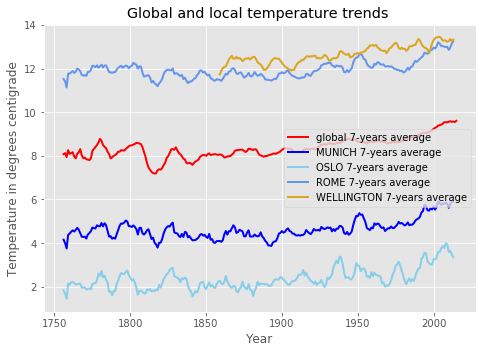

In [22]:
temp_oslo = pd.read_csv('results_oslo.csv')
temp_rome = pd.read_csv('results_rome.csv')
temp_wel = pd.read_csv('results_wel.csv')
temp_oslo['7yr_avg'] = temp_oslo['avg_temp'].rolling(window=7).mean()
temp_rome['7yr_avg'] = temp_rome['avg_temp'].rolling(window=7).mean()
temp_wel['7yr_avg'] = temp_wel['avg_temp'].rolling(window=7).mean()

#Plotting the data
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(temp_global['year'], temp_global['7yr_avg'], label="global 7-years average", lw=2, color = 'red')
ax.plot(temp_muc['year'], temp_muc['7yr_avg'], label="MUNICH 7-years average", lw=2, color = 'blue')
ax.plot(temp_oslo['year'], temp_oslo['7yr_avg'], label="OSLO 7-years average", lw=2, color = 'skyblue')
ax.plot(temp_rome['year'], temp_rome['7yr_avg'], label="ROME 7-years average", lw=2, color = 'cornflowerblue')
ax.plot(temp_wel['year'], temp_wel['7yr_avg'], label="WELLINGTON 7-years average", lw=2, color = 'goldenrod')

ax.set_xlabel('Year')
ax.set_ylabel('Temperature in degrees centigrade')
ax.set_title('Global and local temperature trends ')
ax.legend()

European cities are denoted with blueish colors in the plot above. In Oslo the 1950-"bump" can be seen in the data, in Rome data it is not so obvious, and in Wellington data it is absent - which means that the higher temperatures around 1950 might be a local feature restricted to central and northern Europe.